Data preparation

In [ ]:
#Se obtienen datos de una colección de csv con información historica.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
#Carga de los datos
clouds = pd.read_csv('/content/cloudiness.csv')
date = pd.read_csv('/content/dates.csv')
observations = pd.read_csv('/content/observations.csv')
weather = pd.read_csv('/content/weather.csv')
seasons = pd.read_csv('/content/seasons.csv')




In [ ]:
# Análisis de los datos
from tabulate import tabulate

def summarize_info(dataframes, names):
    summary = []
    for df, name in zip(dataframes, names):
        buffer = []
        buffer.append(f"Dataset: {name}")
        buffer.append("-" * 30)
        buffer.append(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
        buffer.append(f"Columnas: {', '.join(df.columns)}")
        buffer.append(f"Tipos de datos:\n{df.dtypes}")
        summary.append("\n".join(buffer))
    return summary

dataframes = [clouds, date, observations, weather, seasons]
names = ["Clouds", "Date", "Observations", "Weather", "Seasons"]

for summary in summarize_info(dataframes, names):
    print(summary)
    print("\n")




Dataset: Clouds
------------------------------
Dimensiones: 3 filas, 2 columnas
Columnas: cloudiness, cloudiness_id
Tipos de datos:
cloudiness       object
cloudiness_id     int64
dtype: object


Dataset: Date
------------------------------
Dimensiones: 25000 filas, 2 columnas
Columnas: date, date_id
Tipos de datos:
date       object
date_id     int64
dtype: object


Dataset: Observations
------------------------------
Dimensiones: 25000 filas, 12 columnas
Columnas: date_id, precipitation, temp_max, temp_min, wind, humidity, pressure, solar_radiation, visibility, weather_id, cloudiness_id, estacion_id
Tipos de datos:
date_id              int64
precipitation      float64
temp_max           float64
temp_min           float64
wind               float64
humidity           float64
pressure           float64
solar_radiation    float64
visibility         float64
weather_id           int64
cloudiness_id        int64
estacion_id          int64
dtype: object


Dataset: Weather
------------------

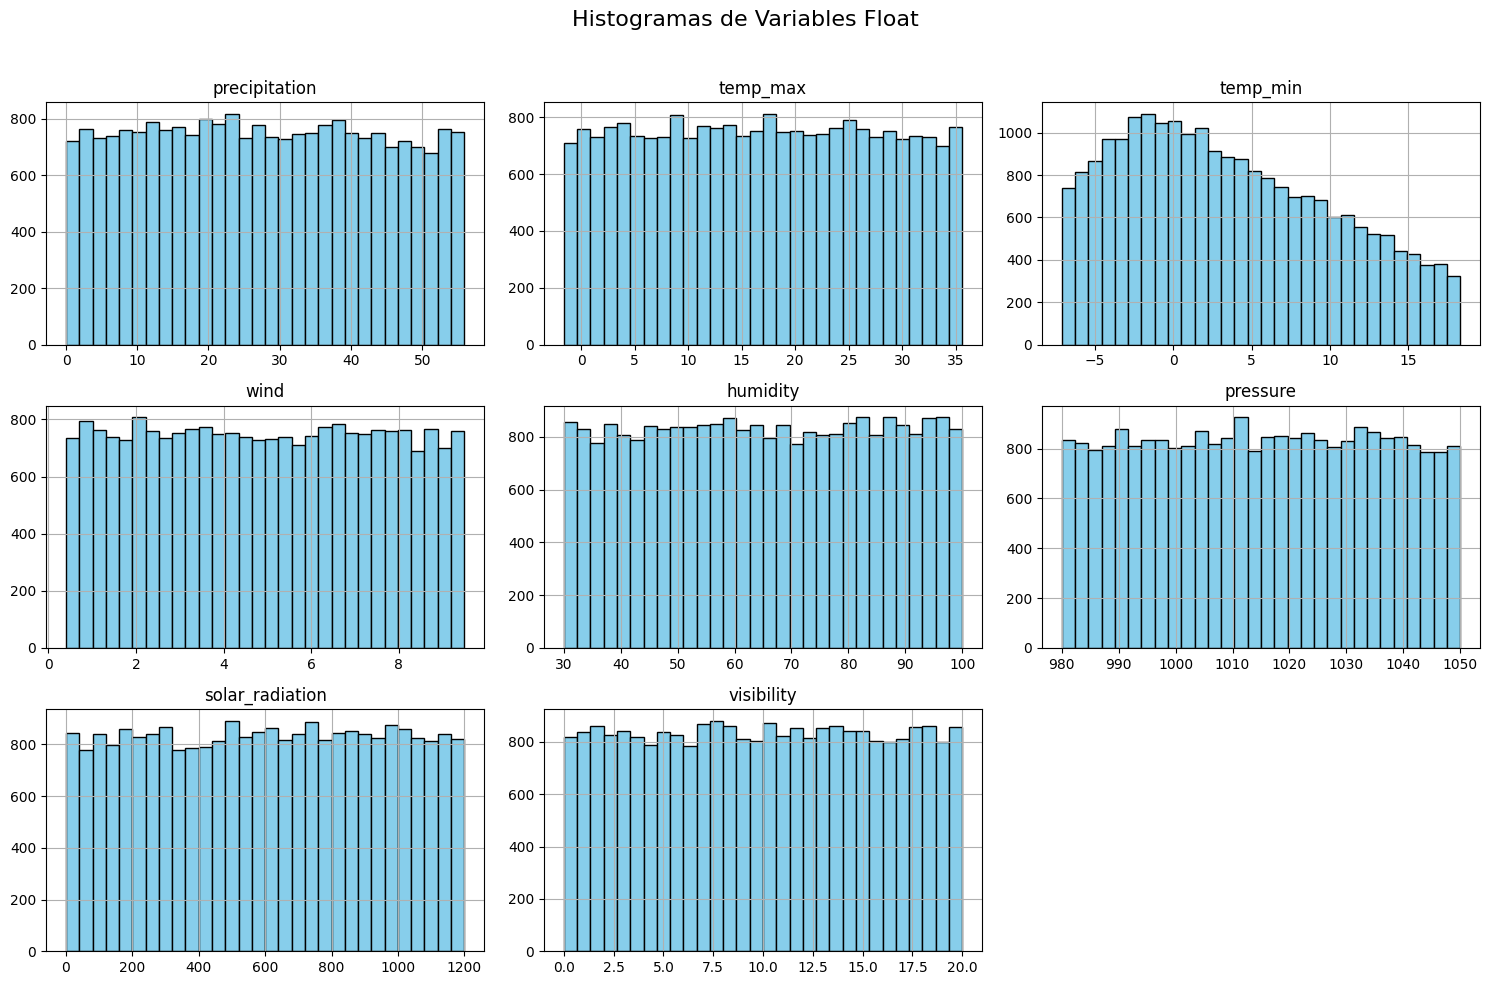

In [ ]:
# En este fragmento utilizamos
float_columns = ['precipitation', 'temp_max', 'temp_min', 'wind', 'humidity',
                 'pressure', 'solar_radiation', 'visibility']

observations[float_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de Variables Float', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Limpieza de los datos

In [ ]:
#Una vez se ha analizado la distribución de los datos de nuestro dataset, se concluye que la mejor opción es utilizar
nulos_por_columna = observations.isnull().sum()

registros_con_nulos = observations.isnull().any(axis=1).sum()

print("Valores nulos por columna:")
print(nulos_por_columna)
print("\nTotal de registros con al menos un valor nulo:", registros_con_nulos)

Valores nulos por columna:
date_id               0
precipitation      2500
temp_max           2500
temp_min           2500
wind               2500
humidity              0
pressure              0
solar_radiation       0
visibility            0
weather_id            0
cloudiness_id         0
estacion_id           0
dtype: int64

Total de registros con al menos un valor nulo: 2500


In [ ]:
for col in observations.columns:
    if pd.api.types.is_numeric_dtype(observations[col]):
        rolling_median = observations[col].rolling(window=50 * 2 + 1, min_periods=1, center=True).median()
        observations[col] = observations[col].fillna(rolling_median)

if observations.isnull().any().any():
    print("Advertencia: Algunos valores nulos no pudieron ser completados. Revisa los datos originales.")
else:
    print("Todos los valores nulos fueron completados exitosamente.")

observations.head()

Todos los valores nulos fueron completados exitosamente.


,date_id,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_id,cloudiness_id,estacion_id
0,1,54.230448,15.073383,-6.562472,8.095455,87.032370,998.053811,486.643766,8.652179,1,1,1
1,2,30.869029,5.216605,3.346602,9.335632,50.216442,996.342415,437.659649,9.891872,1,1,2
2,3,17.669961,8.531567,-0.721817,4.586739,91.584489,984.425947,1160.790883,18.202572,2,2,3
3,4,14.603114,23.864145,-3.441596,4.616143,64.508056,998.252864,1116.851586,6.503722,2,2,2
4,5,12.834214,19.054271,-5.092593,5.948388,34.125733,1045.368338,467.512619,11.883286,1,1,2


In [ ]:
nulos_por_columna = observations.isnull().sum()

registros_con_nulos = observations.isnull().any(axis=1).sum()

print("Valores nulos por columna:")
print(nulos_por_columna)
print("\nTotal de registros con al menos un valor nulo:", registros_con_nulos) 

Valores nulos por columna:
date_id            0
precipitation      0
temp_max           0
temp_min           0
wind               0
humidity           0
pressure           0
solar_radiation    0
visibility         0
weather_id         0
cloudiness_id      0
estacion_id        0
dtype: int64

Total de registros con al menos un valor nulo: 0


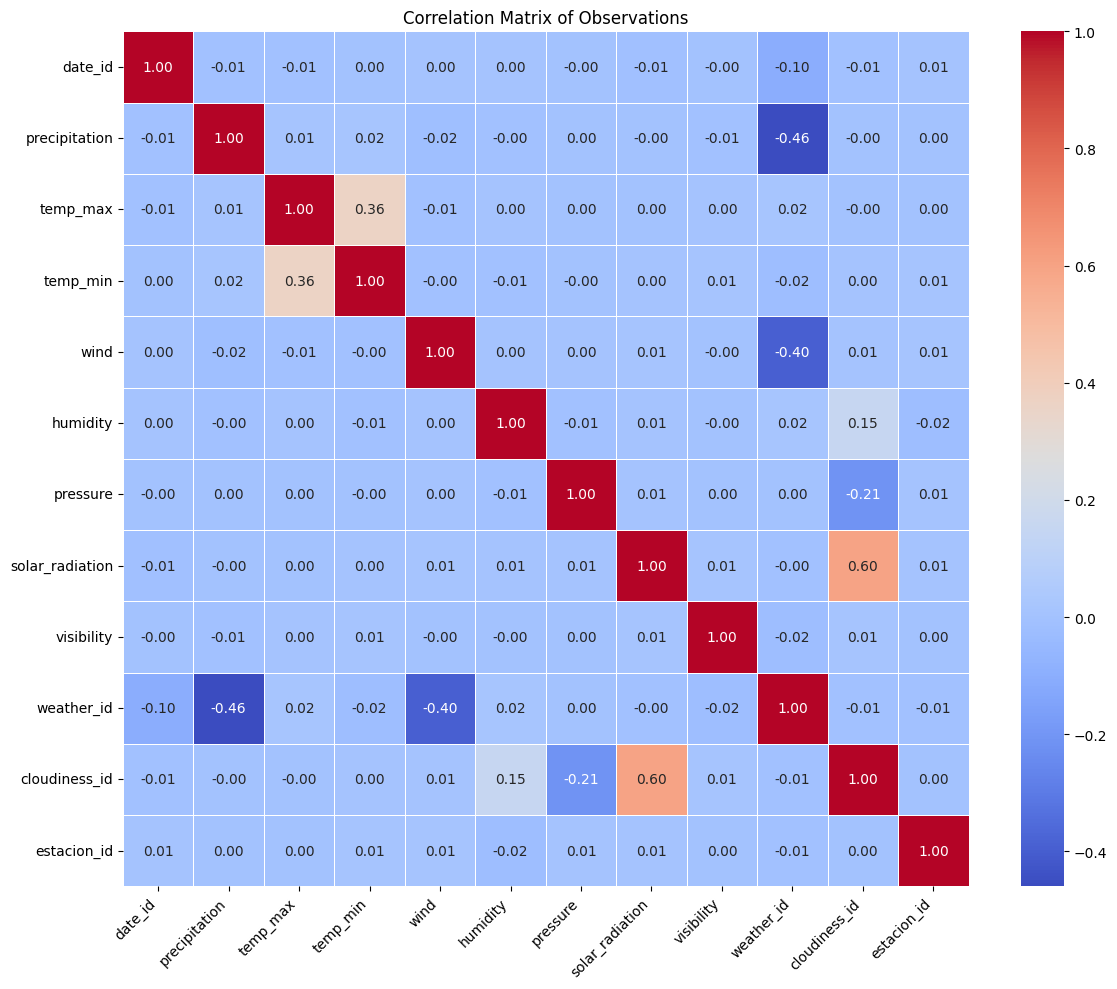

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = observations.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Observations')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:

correlation_matrix = observations.corr()

negative_correlations = correlation_matrix[correlation_matrix < 0]

columns_to_drop = negative_correlations.any().index[negative_correlations.any()]

observations = observations.drop(columns=columns_to_drop)

print("Remaining columns:", observations.columns)

Remaining columns: Index([], dtype='object')
